In [2]:
import pickle
import random
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [3]:
filedata=open('data.pkl', 'rb')
filedata=pickle.load(filedata)

In [4]:
print(filedata)

[[ 0.00000000e+00  2.00000000e+00]
 [ 1.00000000e-03  2.02599961e+00]
 [ 2.00000000e-03  2.05199691e+00]
 ...
 [ 4.99700000e+00 -2.19781538e+01]
 [ 4.99800000e+00 -2.19609488e+01]
 [ 4.99900000e+00 -2.19436572e+01]]


In [5]:
print(len(filedata[0]))

2


In [6]:
trainData=[]
for i in range(int(0.9*len(filedata))):
    trainData.append([filedata[i][0],filedata[i][1]])

In [7]:
print(trainData)

[[0.0, 2.0], [0.001, 2.0259996131685853], [0.002, 2.0519969053947253], [0.003, 2.0779895559661914], [0.004, 2.1039752446311617], [0.005, 2.1299516518283674], [0.006, 2.1559164589171727], [0.007, 2.181867348407558], [0.008, 2.20780200418999], [0.009000000000000001, 2.233718111765156], [0.01, 2.259613358473534], [0.011, 2.28548543372478], [0.012, 2.311332029226912], [0.013000000000000001, 2.3371508392152576], [0.014, 2.362939560681155], [0.015, 2.3886958936003775], [0.016, 2.414417541161255], [0.017, 2.440102209992484], [0.018000000000000002, 2.4657476103905824], [0.019, 2.491351456546988], [0.02, 2.5169114667747627], [0.021, 2.5424253637348837], [0.022, 2.567890874662104], [0.023, 2.593305731590355], [0.024, 2.6186676715776676], [0.025, 2.6439744369305918], [0.026000000000000002, 2.6692237754280956], [0.027, 2.6944134405449125], [0.028, 2.7195411916743204], [0.029, 2.744604794350333], [0.03, 2.769602020469274], [0.031, 2.794530648510718], [0.032, 2.8193884637577686], [0.033, 2.844173258

In [8]:
testData=[]
for i in range(int(0.9*len(filedata)), len(filedata)):
        testData.append([filedata[i][0],filedata[i][1]])

In [9]:
print(testData)

[[4.5, -15.034122349738123], [4.501, -15.033416214469849], [4.502, -15.03290015889404], [4.503, -15.03257534831415], [4.5040000000000004, -15.032442928160666], [4.505, -15.032504023875092], [4.506, -15.032759740795907], [4.507, -15.033211164046648], [4.508, -15.033859358425861], [4.509, -15.034705368299214], [4.51, -15.03575021749353], [4.511, -15.036994909192941], [4.5120000000000005, -15.038440425837095], [4.513, -15.040087729021405], [4.514, -15.041937759399367], [4.515, -15.043991436587032], [4.516, -15.046249659069488], [4.517, -15.048713304109533], [4.518, -15.051383227658363], [4.519, -15.05426026426855], [4.5200000000000005, -15.057345227008927], [4.521, -15.0606389073818], [4.522, -15.064142075242298], [4.523, -15.06785547871971], [4.524, -15.071779844141233], [4.525, -15.075915875957694], [4.526, -15.080264256671548], [4.527, -15.084825646767097], [4.5280000000000005, -15.089600684642775], [4.529, -15.094589986545767], [4.53, -15.099794146508792], [4.531, -15.105213736289073]

In [10]:
print(len(trainData)+len(testData)) 

5000


In [11]:
shuffleData=[]
for i in range((len(trainData))):
        elem = random.choice(trainData)
        shuffleData.append(elem)
        trainData.remove(elem)
print(shuffleData)

[[2.193, 6.340050182511104], [3.71, -7.697054059969718], [0.737, 5.2028647136009525], [2.873, 3.8996682851594766], [0.377, 1.6050894073689412], [3.9090000000000003, -7.090009835499522], [3.616, -7.260992638692523], [3.019, 1.3095250929399116], [2.204, 6.1265066864720445], [1.991, 7.32091085856302], [4.365, -16.16102229291049], [3.193, 2.453483744532978], [3.044, 1.2865562005295323], [3.604, -7.068595587614691], [1.695, 1.7426928658378449], [3.587, -6.739549460935569], [2.4010000000000002, 4.612177150577578], [2.198, 6.243165168281581], [1.109, 0.626954481037278], [1.236, 2.434979773469359], [3.834, -6.883375192453917], [3.045, 1.2880317630891742], [0.787, 5.442066549349201], [4.37, -16.111874263195688], [3.927, -7.311713757257348], [1.137, 0.7662171926523182], [3.0660000000000003, 1.3570452152560257], [3.325, 1.6815367880155772], [1.298, 3.863555006022006], [1.579, 3.3049870254223706], [2.2560000000000002, 5.167893297261803], [2.907, 2.968470266929615], [2.4130000000000003, 4.754785926

In [92]:
samplingData = [shuffleData[x:x+450] for x in range(0, len(shuffleData), 450)]

In [93]:
samplingData[0]==samplingData[1]

False

In [94]:
print(len(samplingData[i]))

450


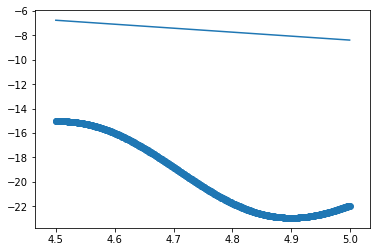

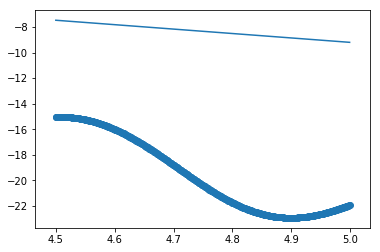

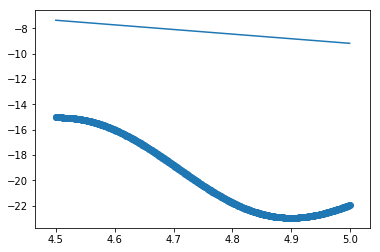

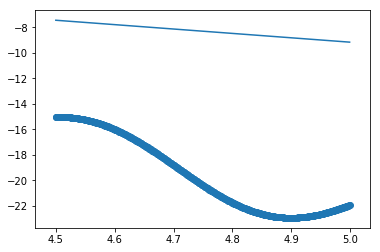

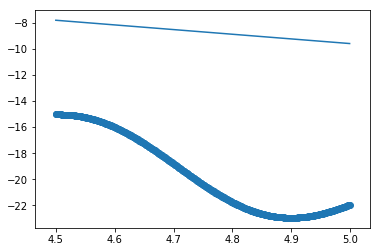

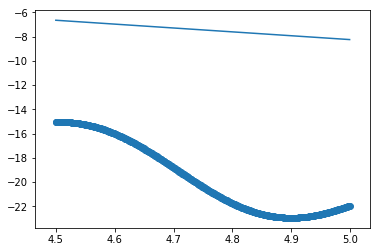

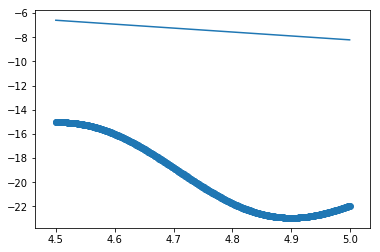

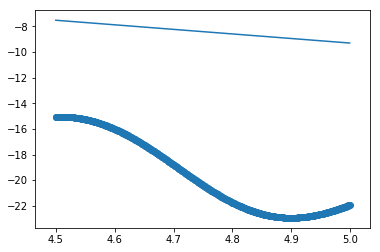

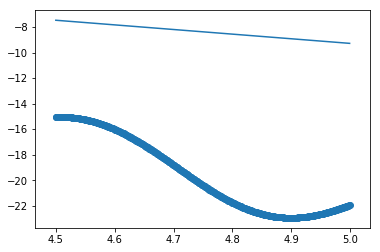

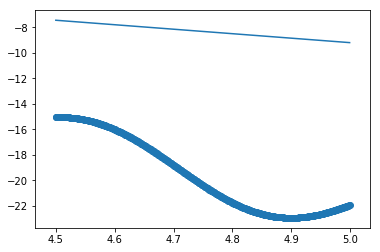

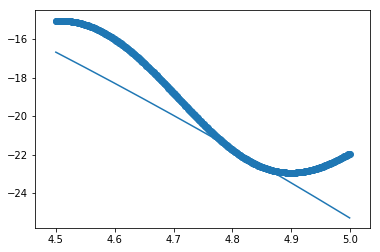

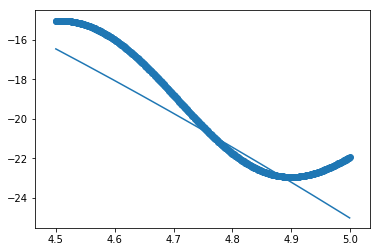

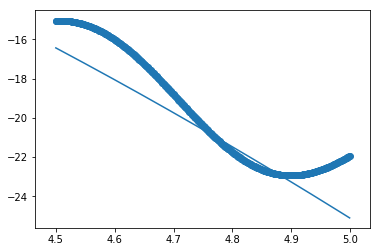

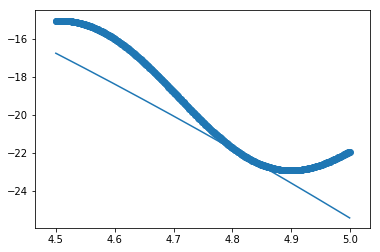

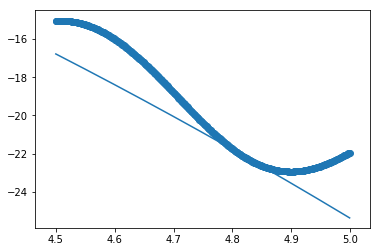

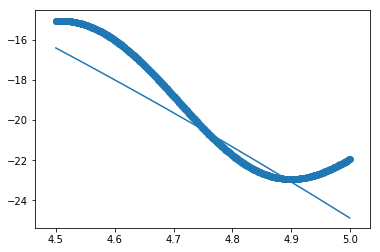

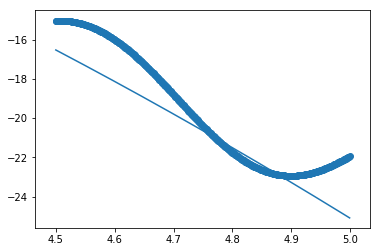

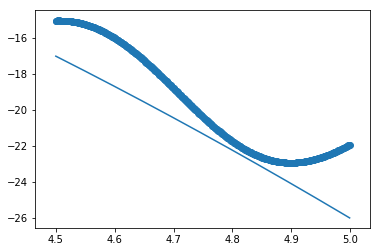

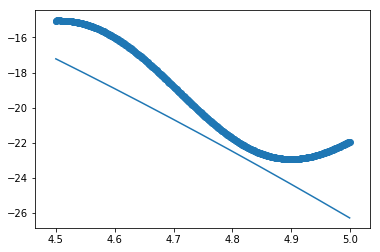

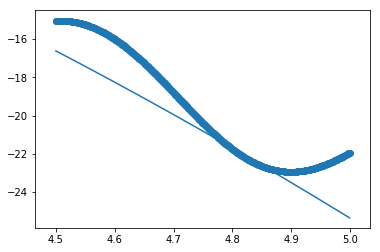

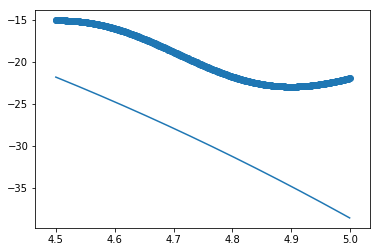

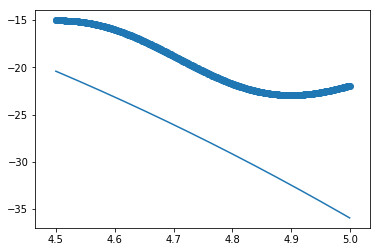

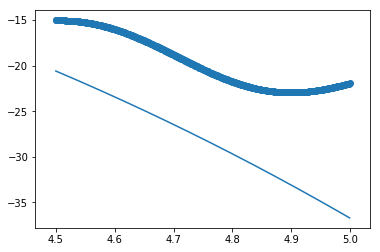

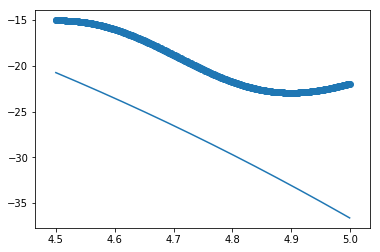

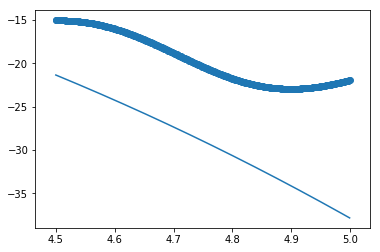

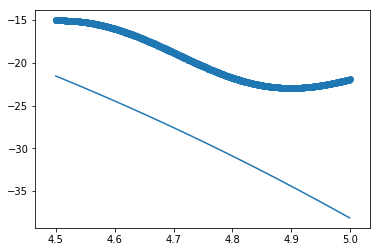

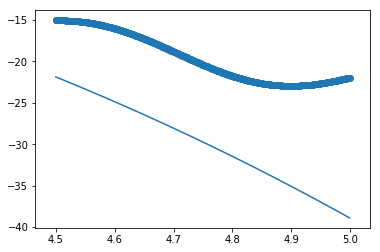

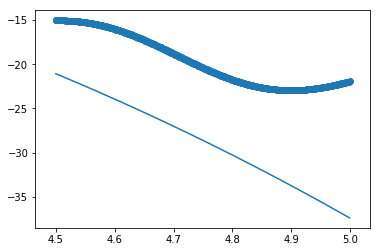

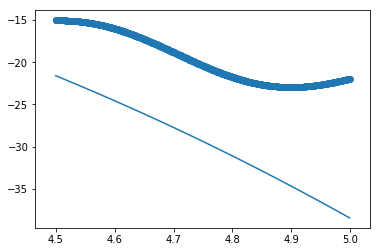

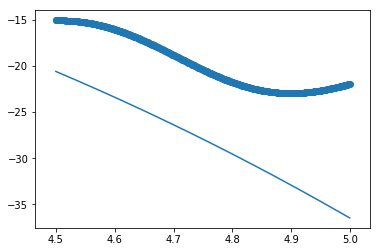

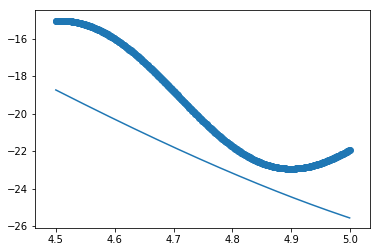

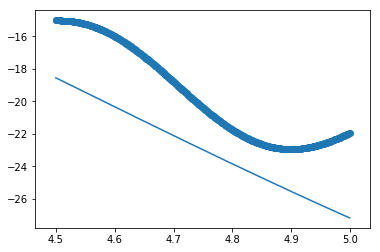

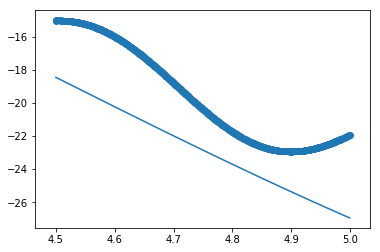

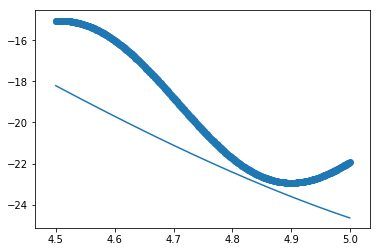

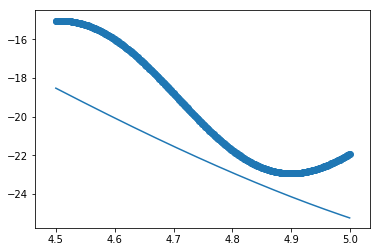

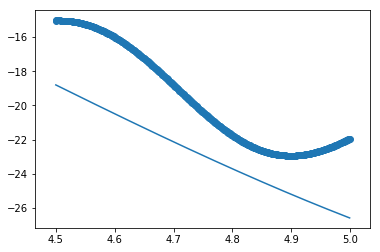

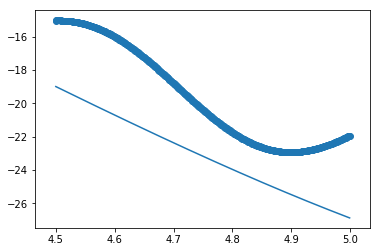

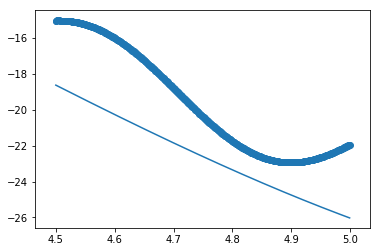

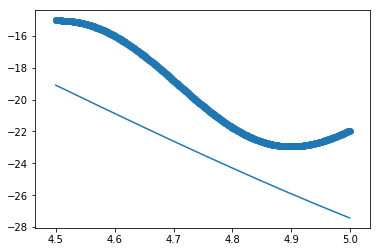

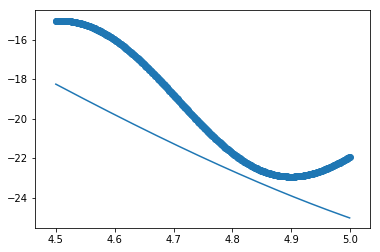

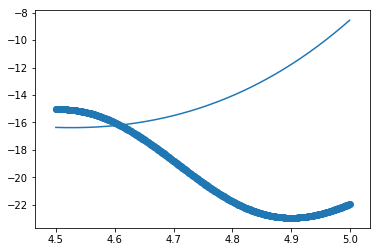

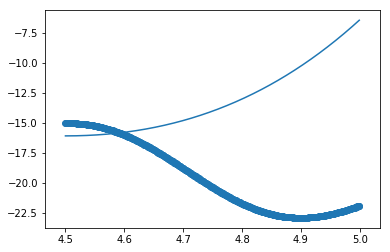

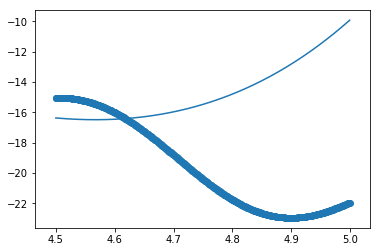

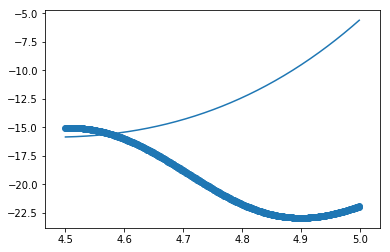

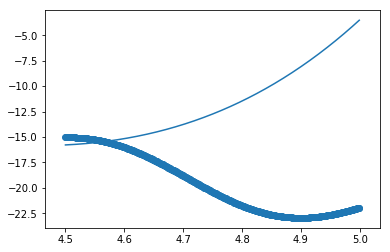

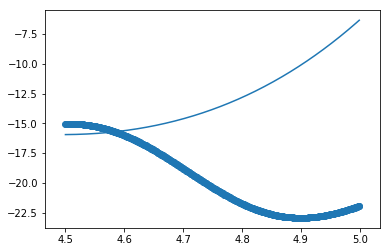

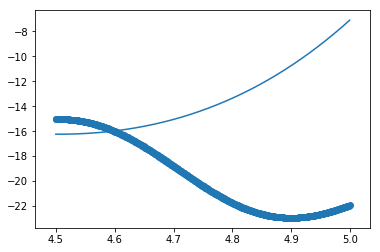

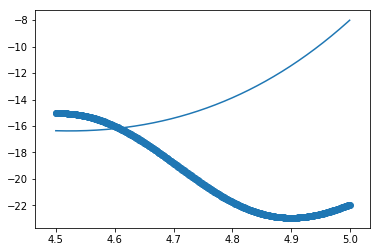

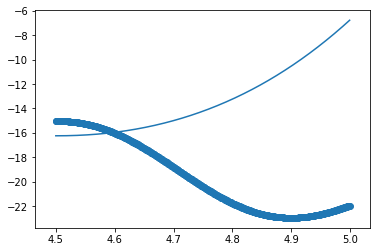

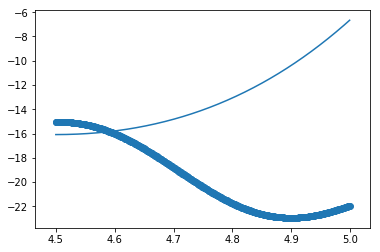

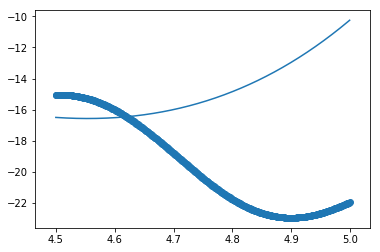

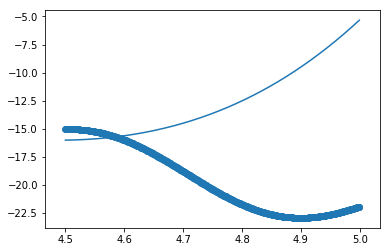

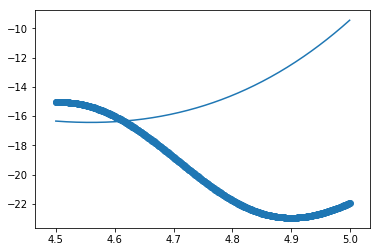

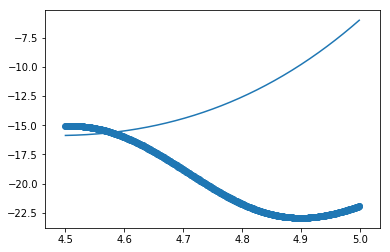

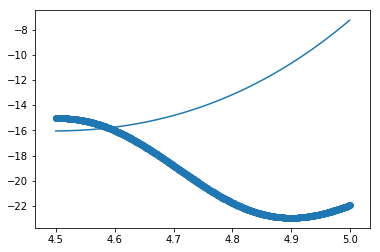

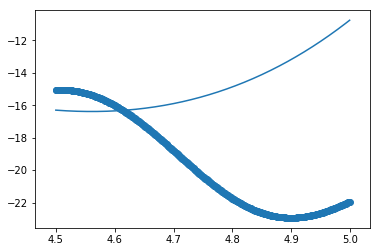

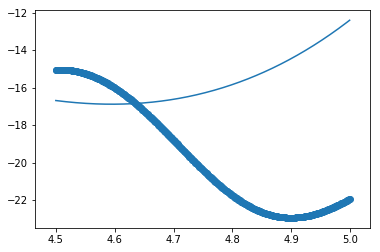

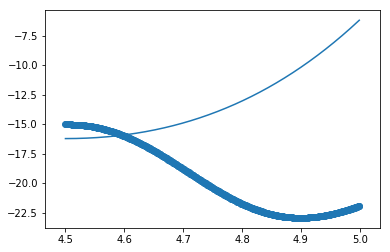

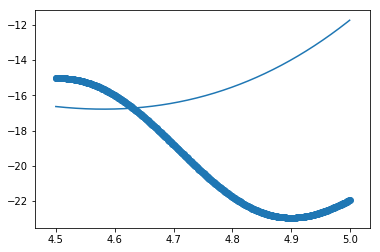

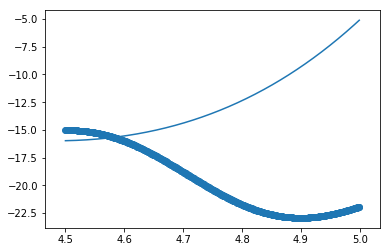

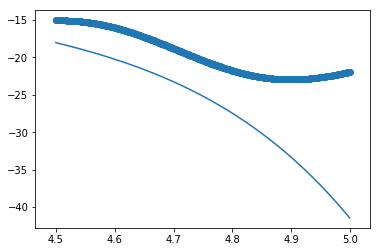

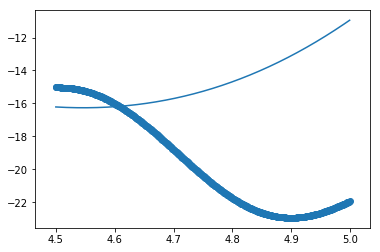

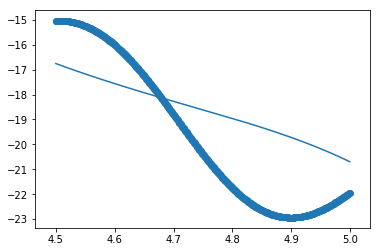

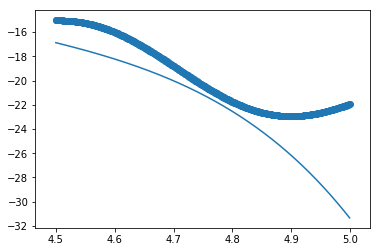

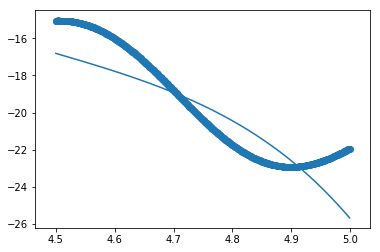

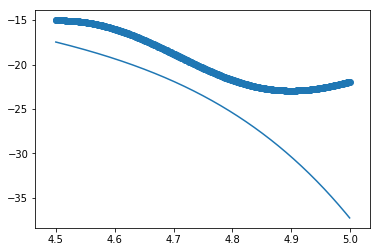

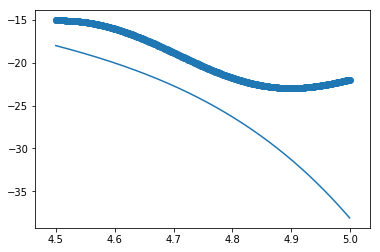

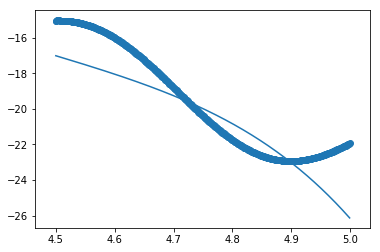

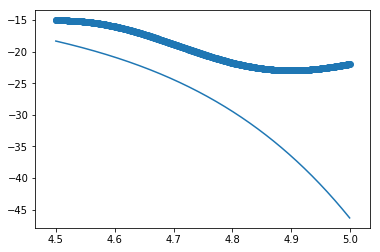

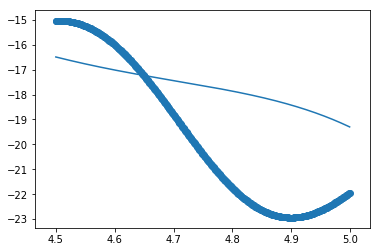

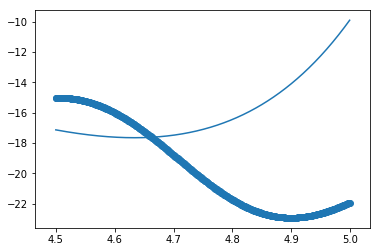

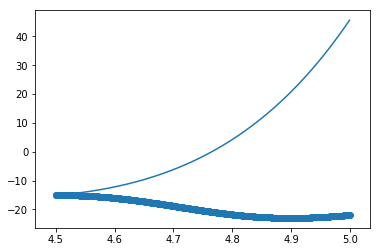

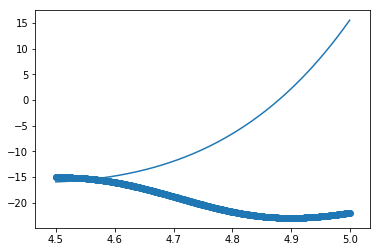

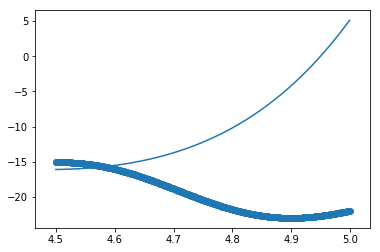

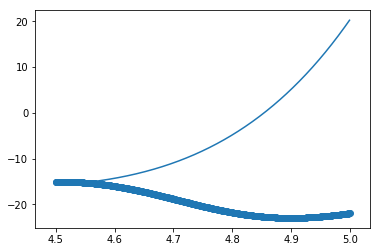

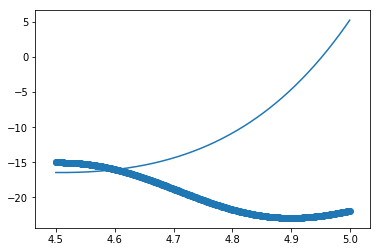

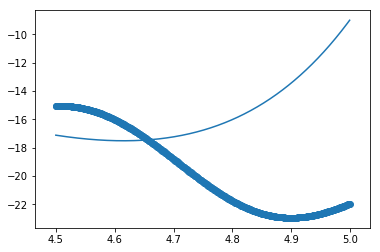

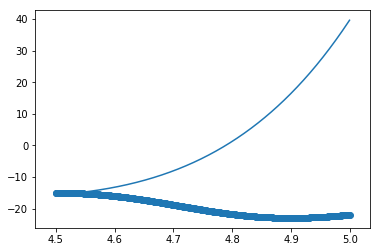

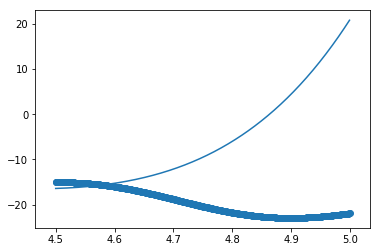

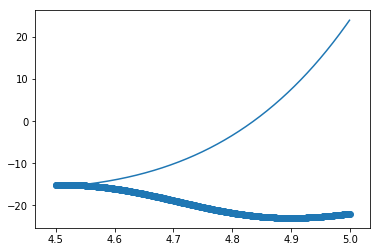

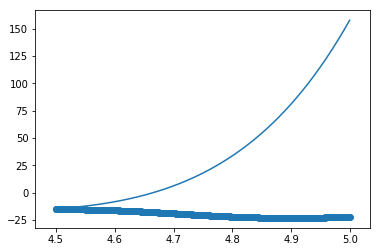

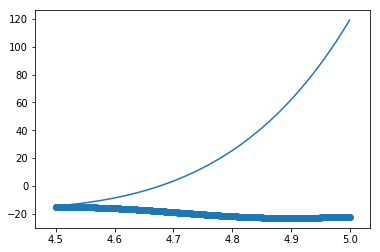

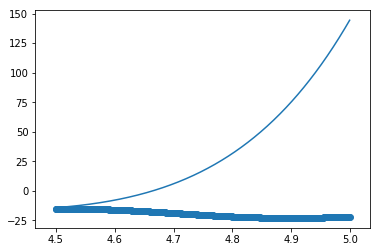

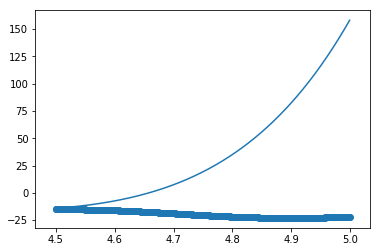

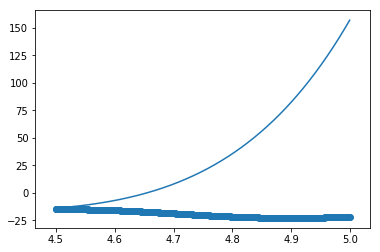

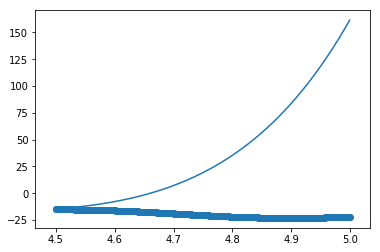

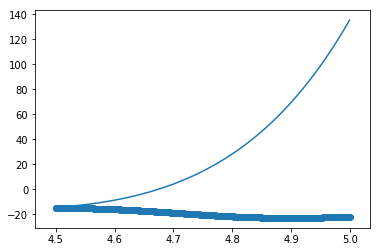

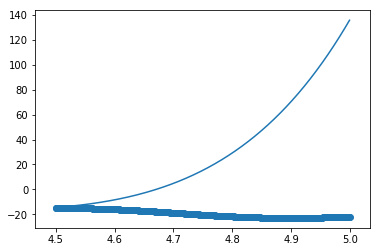

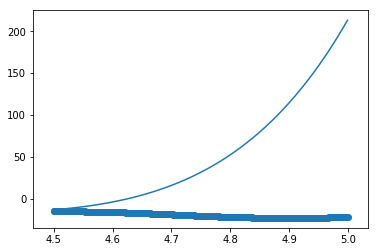

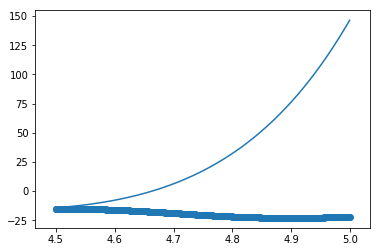

In [117]:
for l in range(1,10):
    for i in range(10):  
        x=[]
        y=[]
        for j in range(len(samplingData[i])):
            xList=[]
            
            for m in range(1,l+1):
                xList.append(samplingData[i][j][0]**m)
            x.append(xList)
            
            y.append(samplingData[i][j][1])
        regrModel=linear_model.LinearRegression()
        
        regrModel.fit(x,y)
        xTest=[]
        xTestPlot=[]
        yTest=[]
        for k in range(len(testData)):
            xTestList=[]
            xTestPlot.append(testData[k][0])
            for m in range(1,l+1):
                xTestList.append(testData[k][0]**m)
            xTest.append(xTestList)
            yTest.append(testData[k][1])
            yPred=regrModel.predict(xTest)
            yTrain=regrModel.predict(x)
        
        plt.scatter(xTestPlot, yTest)
        plt.plot(xTestPlot, yPred)
        plt.show()
      